# Jared Connolly
#### Perm #: 4775391

In [22]:
import math 
import numpy as np

# A

# LU
def factorization(A,b):         # A- n by n matrix, b- n-vector
    Ab= np.zeros((A[0].size, A[0].size+1))
    l=[]                        # index
    Ab[:,:-1]= A
    Ab[:,-1]= b
    Ab1= Ab.copy()
    for i in range(0, len(A)-1):
        a= max(abs(A[i:,i]))
        if abs(a)< 2**(-52):   # machine precision
            print('Error- Matrix is singular')
            return
        ix=list(abs(A[:,i])).index(a)
        l.append((i,ix))
        Ab[i], Ab[ix] = Ab[ix].copy(), Ab[i].copy()
        for j in range(i + 1, len(A)):
            lm = Ab[j,i]/Ab[i,i]
            Ab[j] -= Ab[i]*lm 
            Ab[j,i] = lm        # multipliers
    if Ab[-1,-2] == 0: 
            print('Error- Matrix is singular')
            return
    for k in l: # PA
        Ab1[k[0]], Ab1[k[1]] = Ab1[k[1]].copy(), Ab1[k[0]].copy()
    return Ab, Ab1
# output: U (PA in echelon form)

# Now, to solve upper diagonal system Ux= y
def upper(U,y):               # U- linear system matrix, y- column vector 
    x = np.zeros(len(y))
    for i in range(len(y)- 1,-1,-1):
        c = [U[i,j]*x[j] for j in range(len(y)- 1,i,-1)]
        x[i] = (y[i]-sum(c))/U[i,i]
    return x
# output- column vector x

# Gaussian Elimination, LU
def gaussian(A,b):         # A- n by n matrix, b- n-vector
    LU, PA = factorization(A,b)
    L = np.tril(LU[:,:-1]) # lower triagonal
    U = np.triu(LU[:,:-1]) # upper 
    for i in range(0,len(L)):
        L[i,i] = 1
    return PA[:,:-1], upper(U,LU[:,-1]),L,U
# output- PA with swapped rows

In [33]:
# B

# Input matrix
ab = np.array([[5.,1.,0.,2.,1.],
               [0.,4.,0.,1.,2.],
               [1.,1.,4.,1.,1.],
               [0.,1.,2.,6.,0.],
               [0.,0.,1.,2.,4.]])

bb = np.array([1.,2.,3.,4.,5.])

pab,xb,Lb,Ub = gaussian(ab,bb)

print('Solution')
print(xb)


Solution
[-0.17083787 -0.06746464  0.46028292  0.52448313  0.8726877 ]


In [32]:
# C

# Test code
# Input matrix
ac = np.array([[5.,1.,0.,2.],
               [0.,4.,0.,8.],
               [1.,1.,4.,2.],
               [0.,1.,2.,2.]])

bc = np.array([1.,2.,3.,4.])

factorization(ac,bc)

Error- Matrix is singular


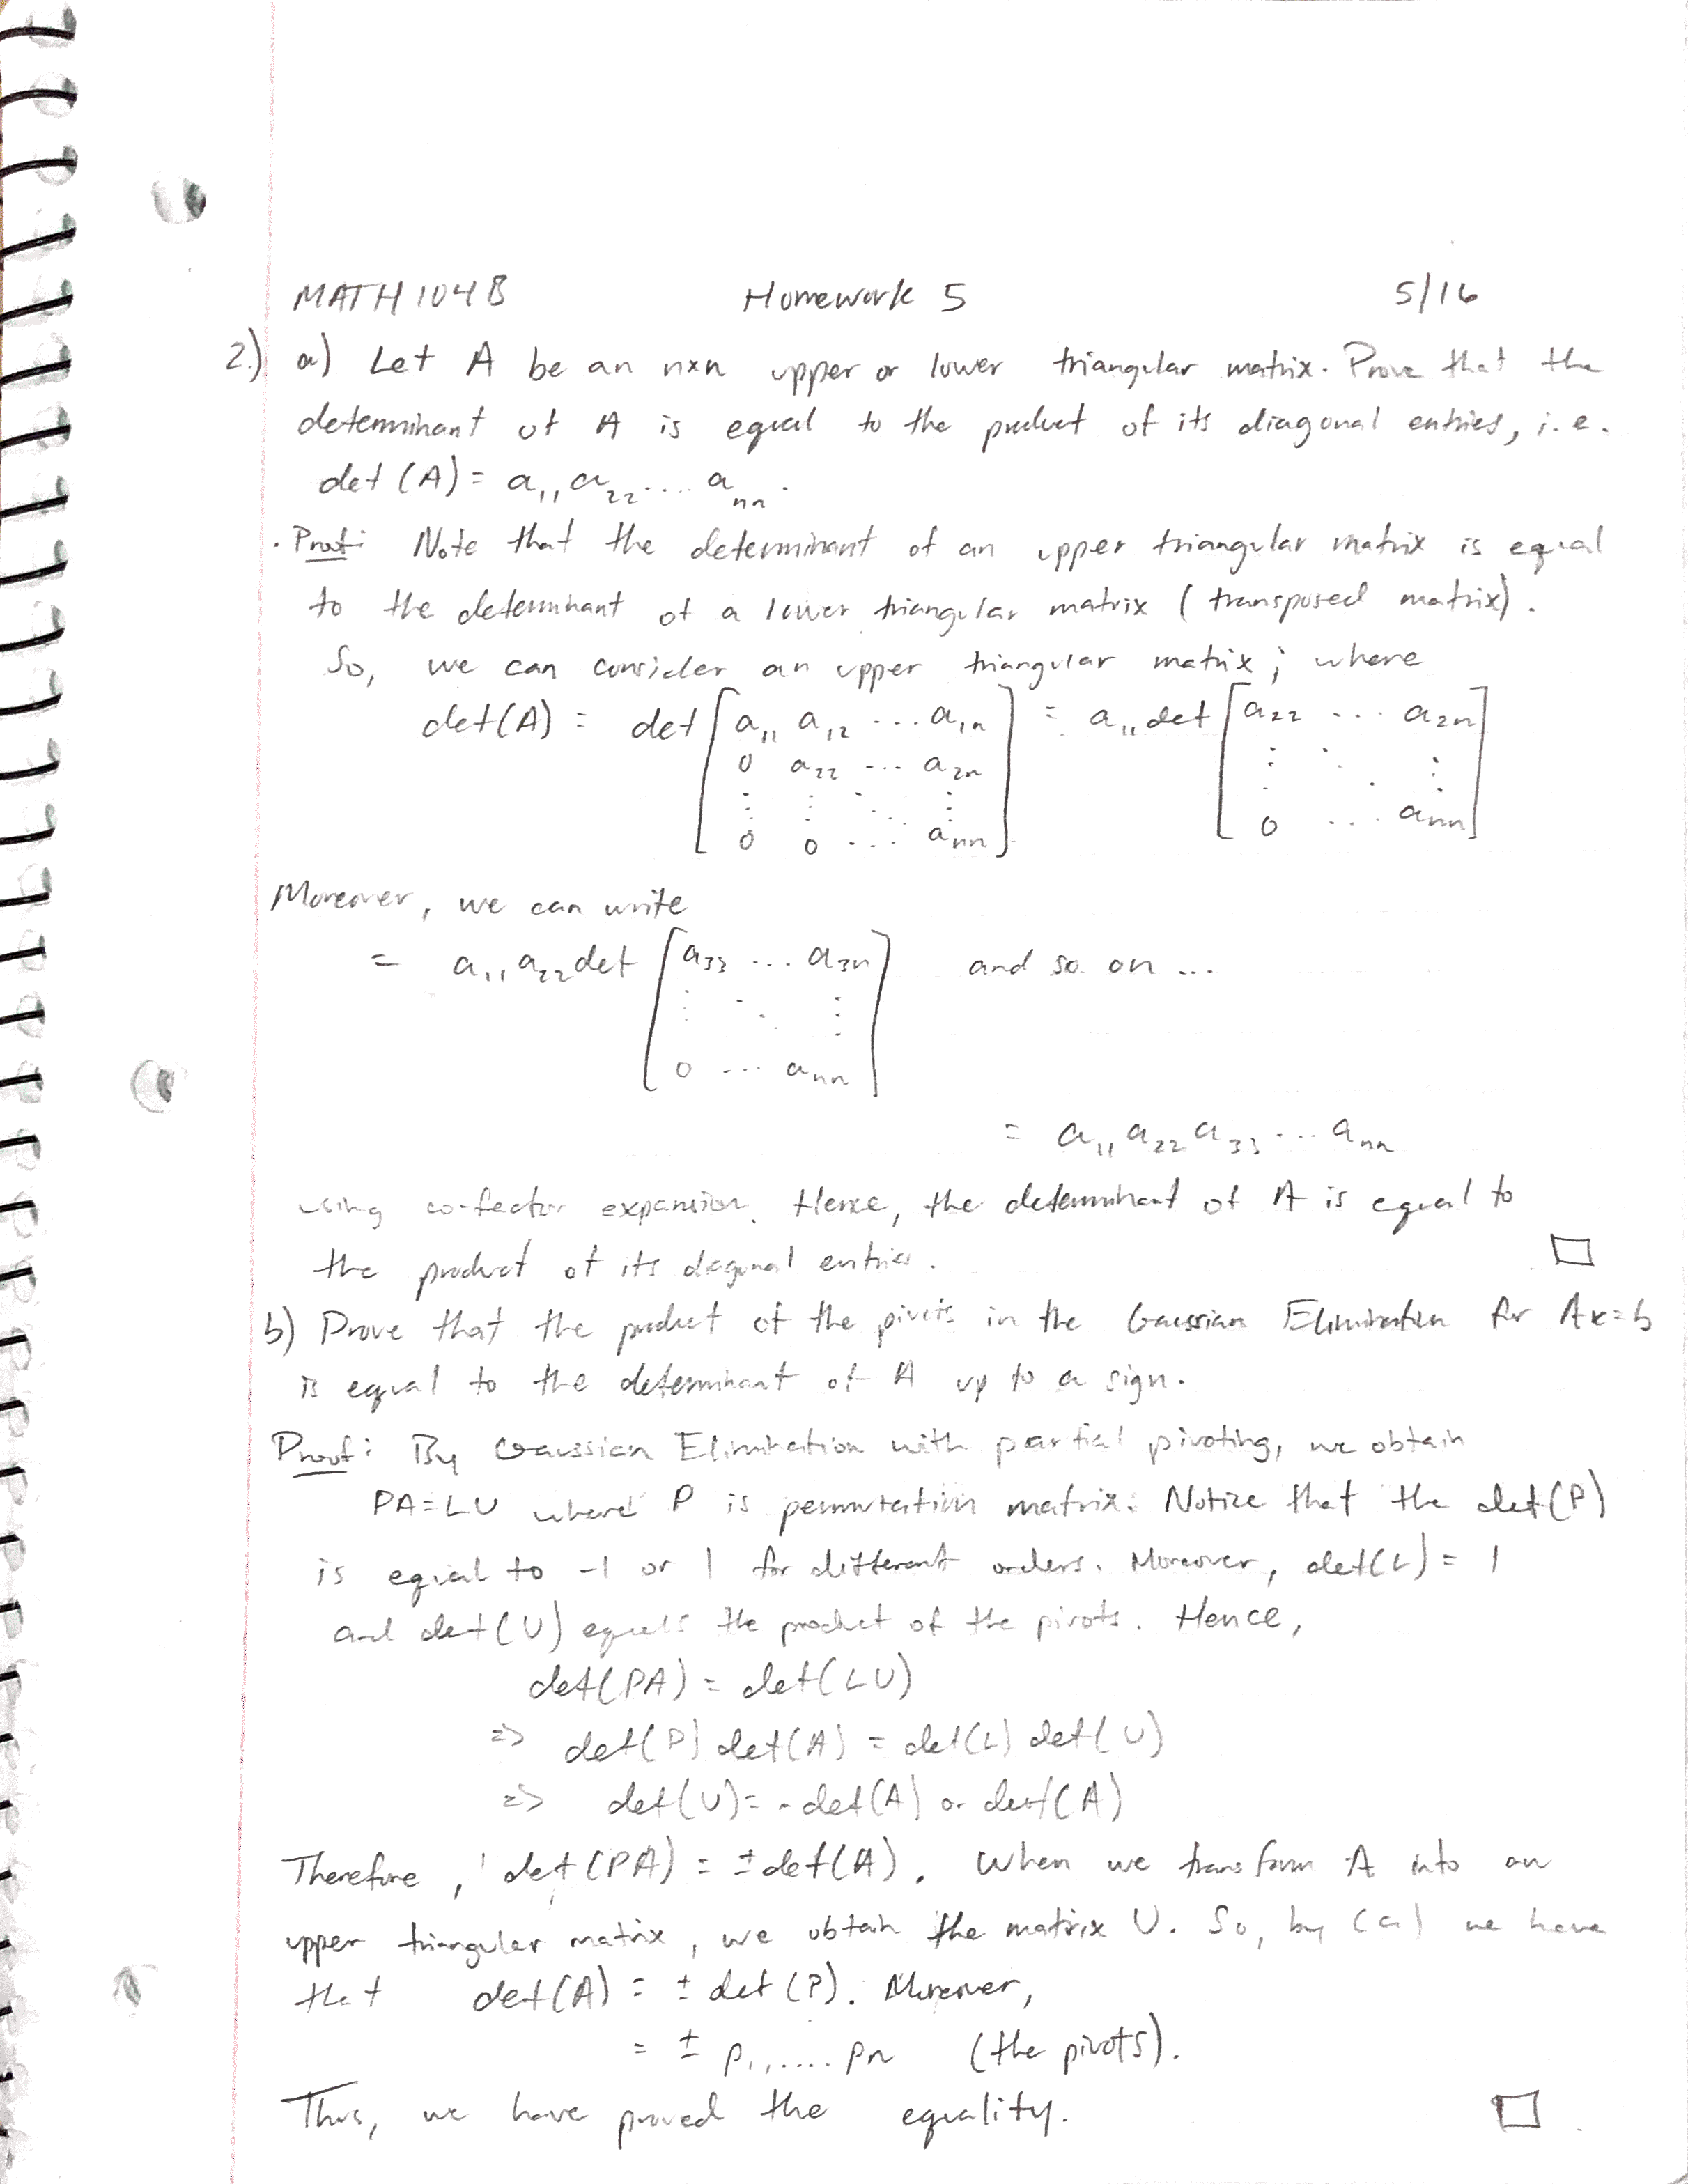

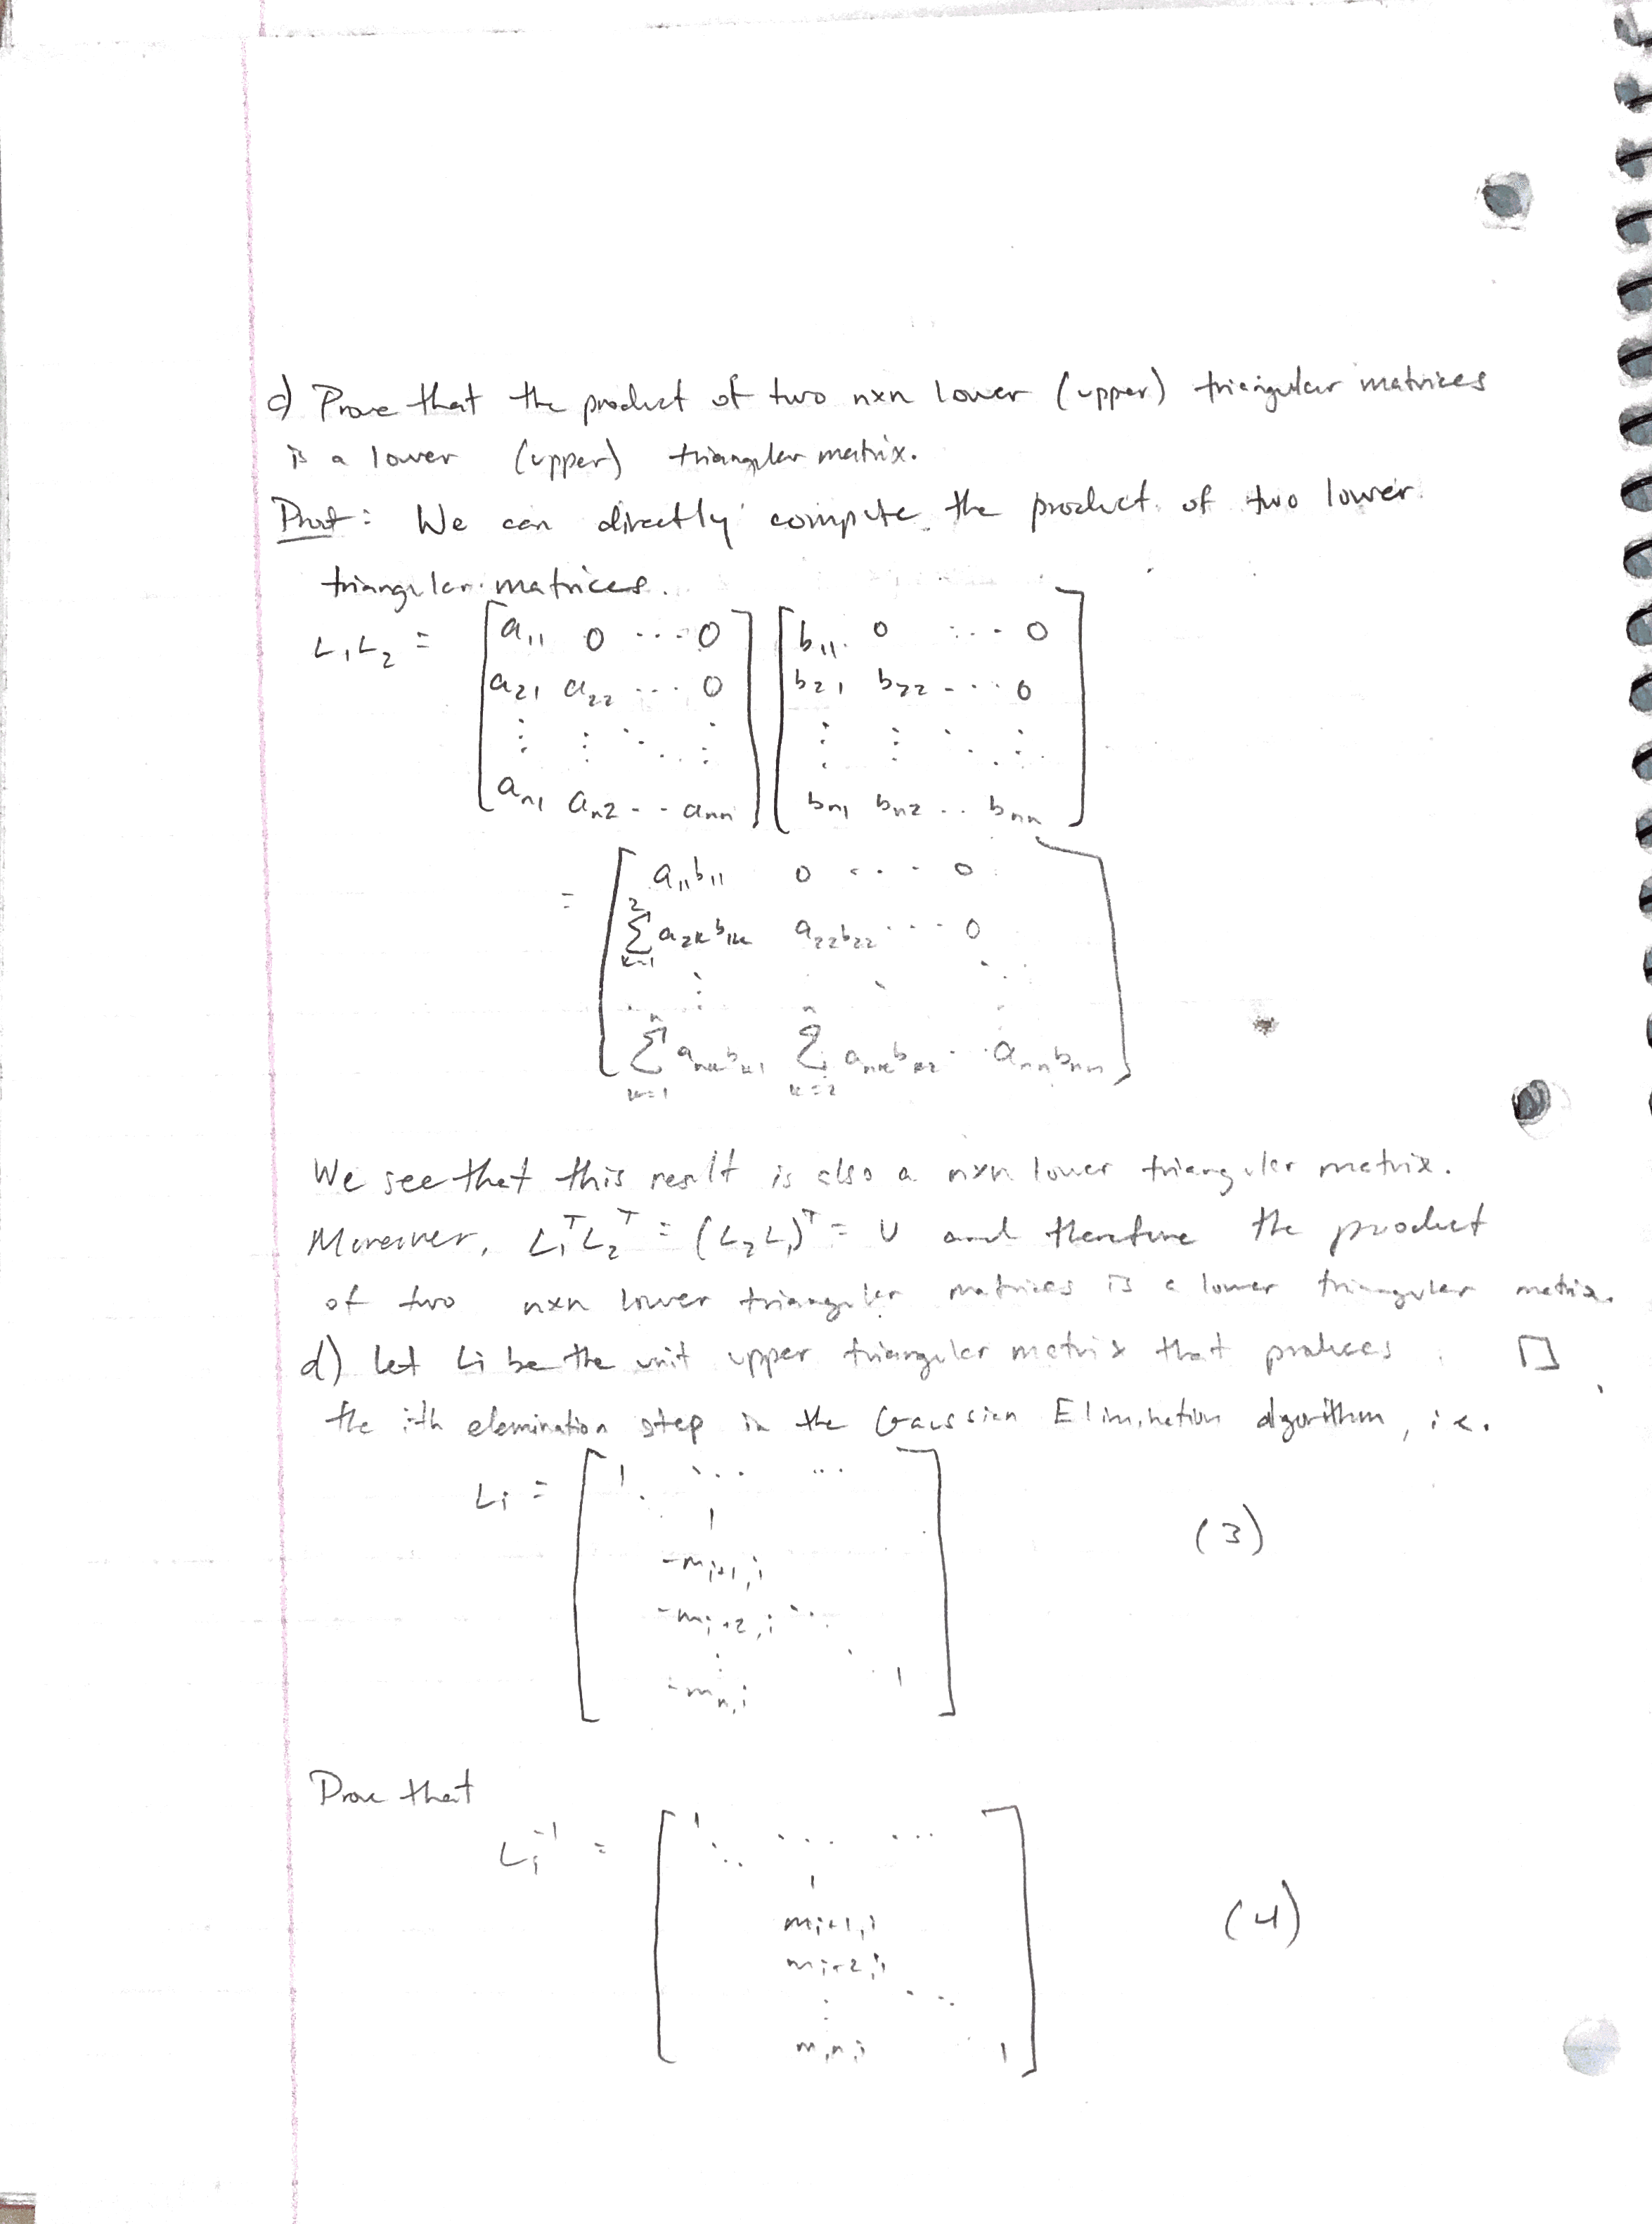

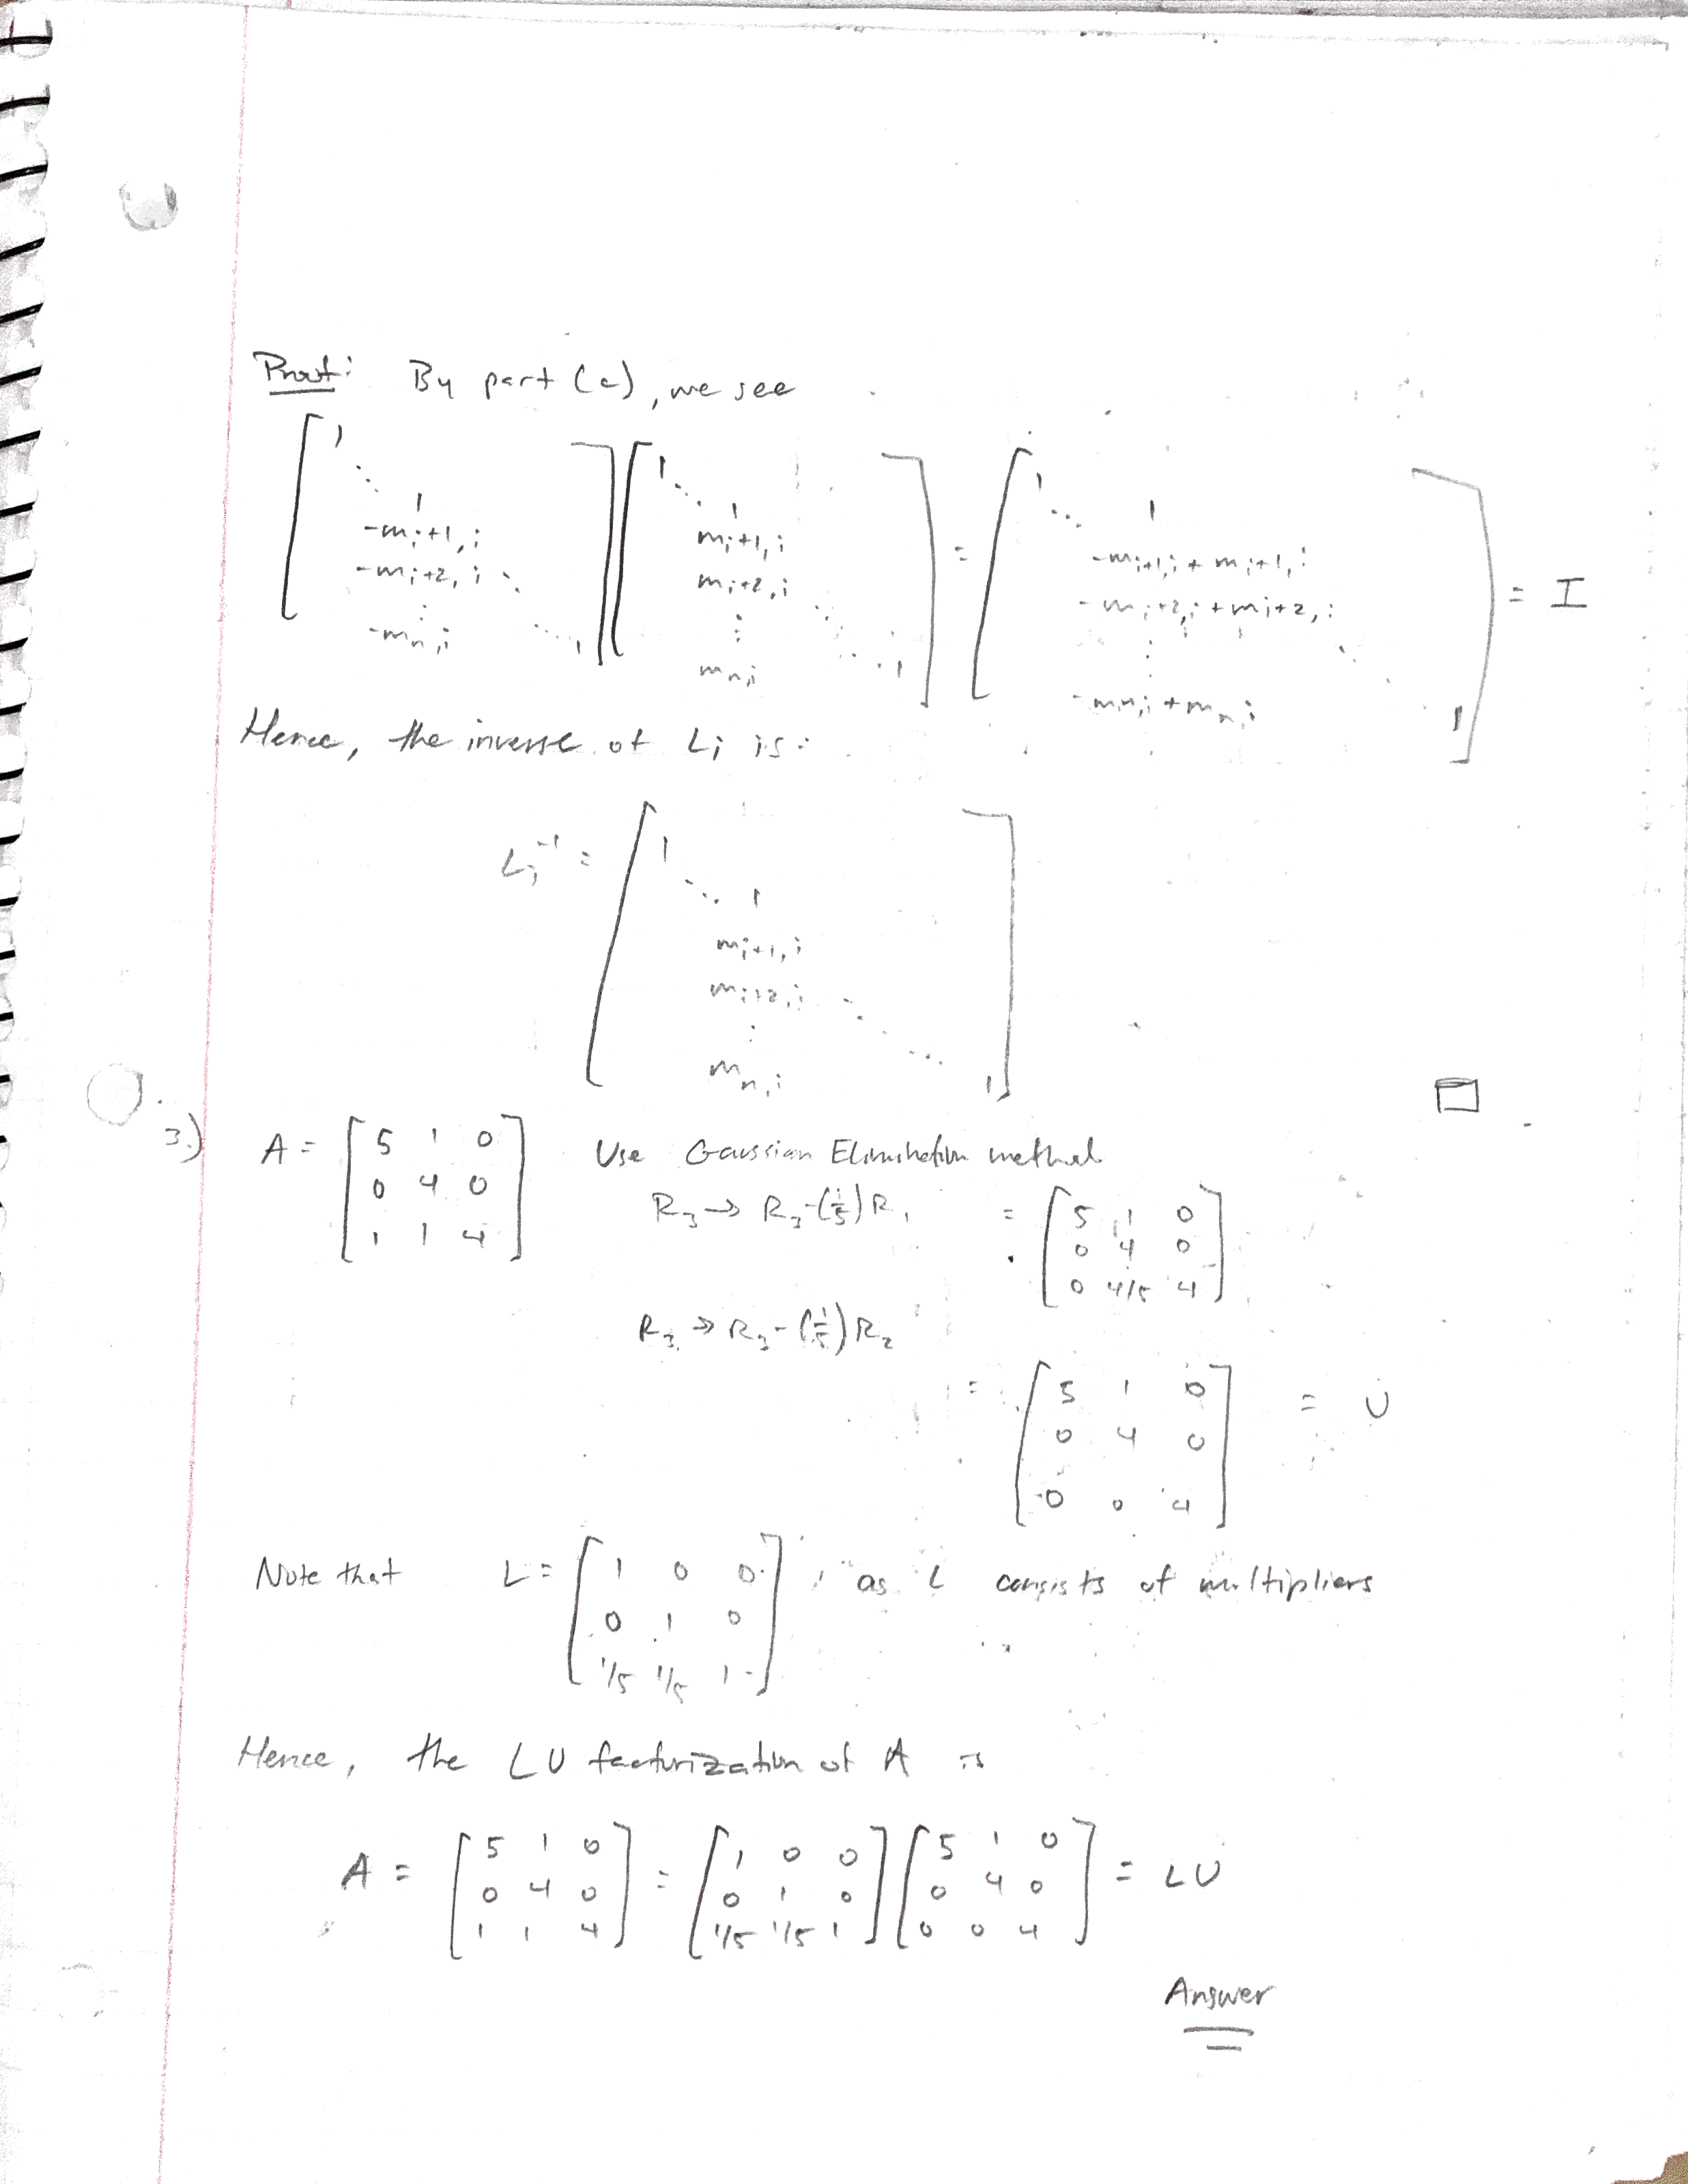

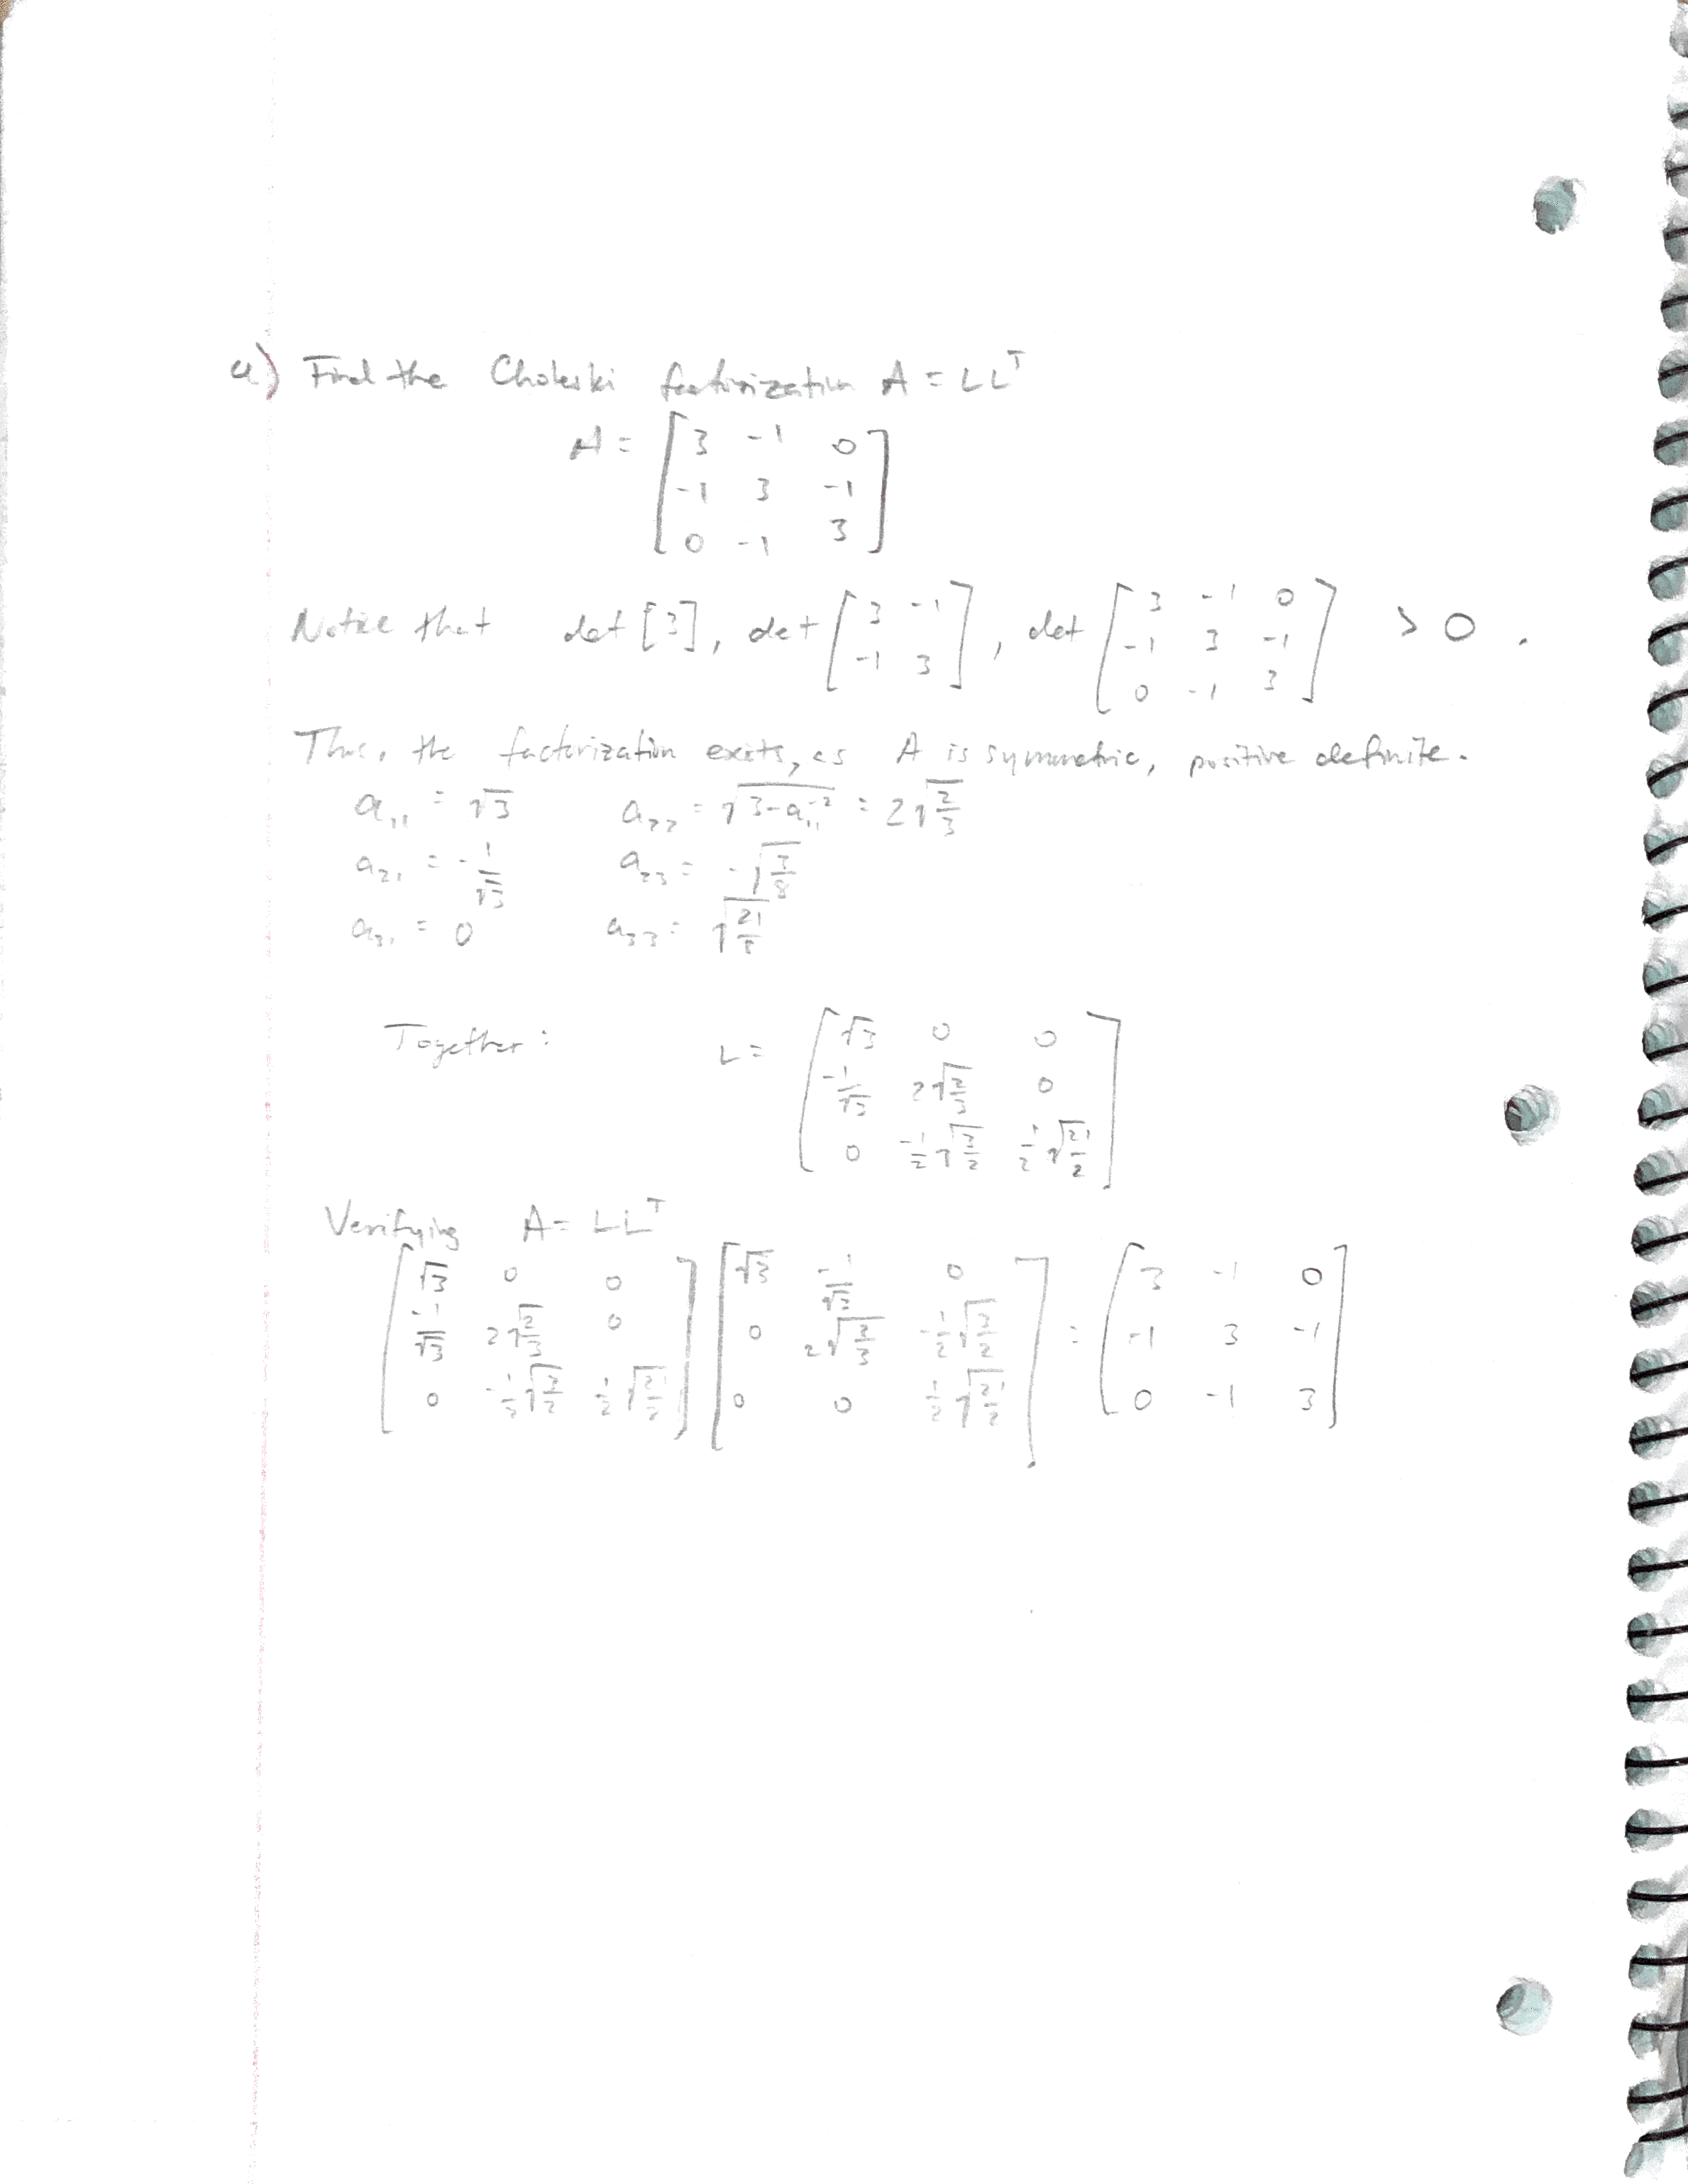